In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-global-forecasting-week-4/submission.csv
/kaggle/input/covid19-global-forecasting-week-4/test.csv
/kaggle/input/covid19-global-forecasting-week-4/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import bokeh 
from bokeh.io import output_notebook
from bokeh.resources import INLINE
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
output_notebook(resources=INLINE)
%matplotlib inline

Loading BokehJS ...

In [3]:
train = pd.DataFrame(pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/train.csv"))

In [4]:
print("The shape of training data is = {}".format(train.shape))

The shape of training data is = (35995, 6)


In [5]:
train.Province_State.fillna("", inplace = True)
train.ConfirmedCases.fillna("", inplace = True)
train.Fatalities.fillna("", inplace = True)

In [6]:
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [7]:
confirmed_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).Fatalities.sum()

date = train["Date"].unique()

[]

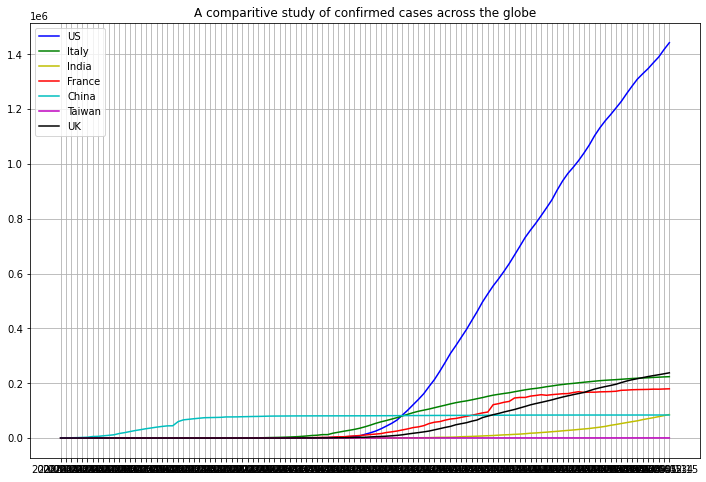

In [8]:
plt.figure(figsize = (12,8))
plt.plot(date, confirmed_cases_us, color = "b", label = "US")
plt.plot(date, confirmed_cases_italy, color = "g", label = "Italy")
plt.plot(date, confirmed_cases_india, color = "y", label = "India")
plt.plot(date, confirmed_cases_france, color = "r", label = "France")
plt.plot(date, confirmed_cases_china, color = "c", label = "China")
plt.plot(date, confirmed_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, confirmed_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of confirmed cases across the globe")
plt.legend()

plt.plot()

[]

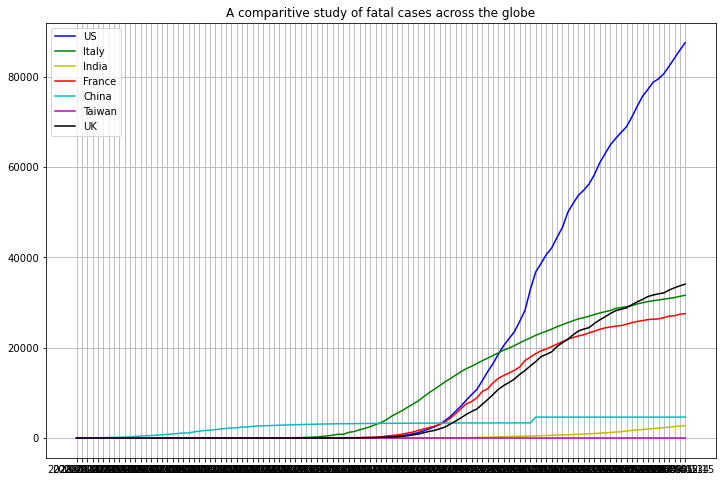

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(date, fatal_cases_us, color = "b", label = "US")
plt.plot(date, fatal_cases_italy, color = "g", label = "Italy")
plt.plot(date, fatal_cases_india, color = "y", label = "India")
plt.plot(date, fatal_cases_france, color = "r", label = "France")
plt.plot(date, fatal_cases_china, color = "c", label = "China")
plt.plot(date, fatal_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, fatal_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of fatal cases across the globe")
plt.legend()

plt.plot()

In [10]:
train["Region"] = train["Country_Region"].astype(str) + train["Province_State"].astype(str)
train.drop(["Country_Region" , "Province_State"], axis = 1, inplace = True)

In [11]:
train.head()

Id        Date  ConfirmedCases  Fatalities       Region
0   1  2020-01-22             0.0         0.0  Afghanistan
1   2  2020-01-23             0.0         0.0  Afghanistan
2   3  2020-01-24             0.0         0.0  Afghanistan
3   4  2020-01-25             0.0         0.0  Afghanistan
4   5  2020-01-26             0.0         0.0  Afghanistan

In [12]:
choro_map = px.choropleth(train, locations = "Region", locationmode = "country names", color = "ConfirmedCases",
                                        hover_name = "Region", animation_frame = "Date")
choro_map.update_layout(title_text = "Global Confirmed Cases", title_x = 0.5, 
                         geo = dict(showframe = False, showcoastlines = True))
choro_map.show()

In [13]:
choro_map = px.choropleth(train, locations = "Region", locationmode = "country names", color = "Fatalities",
                                        hover_name = "Region", animation_frame = "Date")
choro_map.update_layout(title_text = "Fatalities Across The Globe", title_x = 0.5, 
                         geo = dict(showframe = False, showcoastlines = True))
choro_map.show()

In [14]:
df = train

In [15]:
df_cc = df.pivot(index = "Region", columns = "Date", values ="ConfirmedCases")
df_cc.head()

Date         2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Region                                                                    
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Albania             0.0         0.0         0.0         0.0         0.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             0.0         0.0         0.0         0.0         0.0   
Angola              0.0         0.0         0.0         0.0         0.0   

Date         2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
Region                                                                   ...   
Afghanistan         0.0         0.0         0.0         0.0         0.0  ...   
Albania             0.0         0.0         0.0         0.0         0.0  ...   
Algeria             0.0         0.0         0.0         0.0         0.0  ...   
Andorra             0.0         0.0         0.0         0.0         0.0  ...   
Angola              0.0         0.0         0.0         0.0         0.0  ...   

Date         2020-05-06  2020-05-07  2020-05-08  2020-05-09  2020-05-10  \
Region                                                                    
Afghanistan      3392.0      3563.0      3778.0      4033.0      4402.0   
Albania           832.0       842.0       850.0       856.0       868.0   
Algeria          4997.0      5182.0      5369.0      5558.0      5723.0   
Andorra           751.0       752.0       752.0       754.0       755.0   
Angola             36.0        36.0        43.0        43.0        45.0   

Date         2020-05-11  2020-05-12  2020-05-13  2020-05-14  2020-05-15  
Region                                                                   
Afghanistan      4687.0      4963.0      5226.0      5639.0      6053.0  
Albania           872.0       876.0       880.0       898.0       916.0  
Algeria          5891.0      6067.0      6253.0      6442.0      6629.0  
Andorra           755.0       758.0       760.0       761.0       761.0  
Angola             45.0        45.0        45.0        48.0        48.0  

[5 rows x 115 columns]

In [16]:
df_fc = df.pivot(index = "Region" , columns = "Date", values = "Fatalities")
df_fc.head()

Date         2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Region                                                                    
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Albania             0.0         0.0         0.0         0.0         0.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             0.0         0.0         0.0         0.0         0.0   
Angola              0.0         0.0         0.0         0.0         0.0   

Date         2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
Region                                                                   ...   
Afghanistan         0.0         0.0         0.0         0.0         0.0  ...   
Albania             0.0         0.0         0.0         0.0         0.0  ...   
Algeria             0.0         0.0         0.0         0.0         0.0  ...   
Andorra             0.0         0.0         0.0         0.0         0.0  ...   
Angola              0.0         0.0         0.0         0.0         0.0  ...   

Date         2020-05-06  2020-05-07  2020-05-08  2020-05-09  2020-05-10  \
Region                                                                    
Afghanistan       104.0       106.0       109.0       115.0       120.0   
Albania            31.0        31.0        31.0        31.0        31.0   
Algeria           476.0       483.0       488.0       494.0       502.0   
Andorra            46.0        47.0        47.0        48.0        48.0   
Angola              2.0         2.0         2.0         2.0         2.0   

Date         2020-05-11  2020-05-12  2020-05-13  2020-05-14  2020-05-15  
Region                                                                   
Afghanistan       122.0       127.0       132.0       136.0       153.0  
Albania            31.0        31.0        31.0        31.0        31.0  
Algeria           507.0       515.0       522.0       529.0       536.0  
Andorra            48.0        48.0        49.0        49.0        49.0  
Angola              2.0         2.0         2.0         2.0         2.0  

[5 rows x 115 columns]

In [17]:
df_cc.to_csv("confirmed_cases.csv", encoding = "utf-8-sig")
df_fc.to_csv("Fatal_cases.csv", encoding = "utf-8-sig")

# Analyzing Confirmed Cases

In [18]:
import IPython
url = "https://preview.flourish.studio/2028487/MSZ6a_Ik9B_0QweCuvJ6rs6D4N51xPsZwqIiymulW2sjdt_iKQcrLXrIG9d7HezS/"
iframe = '<iframe src=' + url + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [19]:
train.head()

Id        Date  ConfirmedCases  Fatalities       Region
0   1  2020-01-22             0.0         0.0  Afghanistan
1   2  2020-01-23             0.0         0.0  Afghanistan
2   3  2020-01-24             0.0         0.0  Afghanistan
3   4  2020-01-25             0.0         0.0  Afghanistan
4   5  2020-01-26             0.0         0.0  Afghanistan

In [20]:
train = train.set_index("Id")
train.head()

Date  ConfirmedCases  Fatalities       Region
Id                                                     
1   2020-01-22             0.0         0.0  Afghanistan
2   2020-01-23             0.0         0.0  Afghanistan
3   2020-01-24             0.0         0.0  Afghanistan
4   2020-01-25             0.0         0.0  Afghanistan
5   2020-01-26             0.0         0.0  Afghanistan

In [21]:
train_india = train[train["Region"] == "India"]
train_india

Date  ConfirmedCases  Fatalities Region
Id                                                  
16101  2020-01-22             0.0         0.0  India
16102  2020-01-23             0.0         0.0  India
16103  2020-01-24             0.0         0.0  India
16104  2020-01-25             0.0         0.0  India
16105  2020-01-26             0.0         0.0  India
...           ...             ...         ...    ...
16211  2020-05-11         70768.0      2294.0  India
16212  2020-05-12         74292.0      2415.0  India
16213  2020-05-13         78055.0      2551.0  India
16214  2020-05-14         81997.0      2649.0  India
16215  2020-05-15         85784.0      2753.0  India

[115 rows x 4 columns]

In [22]:
train_india["ConfirmedCases"] = train_india["ConfirmedCases"].astype(int)
train_india["Fatalities"] = train_india["Fatalities"].astype(int)

In [23]:
train_india_size = int(len(train_india) * 0.75)
val_india_size = len(train_india) - train_india_size
print("Training size = {}".format(train_india_size))
print("Validation size = {}".format(val_india_size))

Training size = 86
Validation size = 29


In [24]:
train_india_confirmed_cases = train_india[["ConfirmedCases"]]
train_india_fatal_cases = train_india[["Fatalities"]]

In [25]:
print(train_india_confirmed_cases, train_india_fatal_cases)

       ConfirmedCases
Id                   
16101               0
16102               0
16103               0
16104               0
16105               0
...               ...
16211           70768
16212           74292
16213           78055
16214           81997
16215           85784

[115 rows x 1 columns]        Fatalities
Id               
16101           0
16102           0
16103           0
16104           0
16105           0
...           ...
16211        2294
16212        2415
16213        2551
16214        2649
16215        2753

[115 rows x 1 columns]


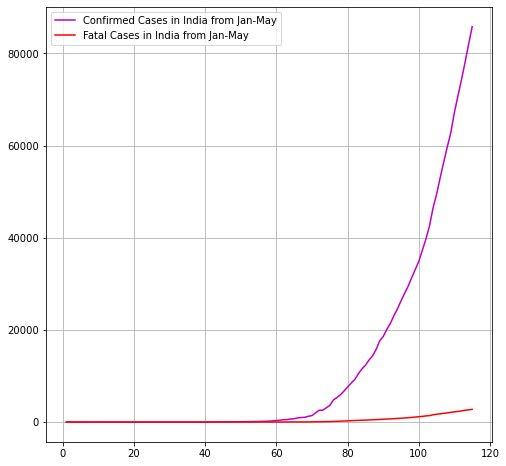

In [26]:
plt.figure(figsize = (8, 8))
x = np.arange(1, 116, 1)
y1 = train_india_confirmed_cases 
y2 = train_india_fatal_cases 
plt.plot(x, y1, color = "m", label = "Confirmed Cases in India from Jan-May")
plt.plot(x, y2, color = "r", label = "Fatal Cases in India from Jan-May")
plt.grid(True)
plt.legend()

## CONFIRMED CASES : 

In [27]:
len(train_india_confirmed_cases)

115

In [28]:
train_india_confirmed_cases

ConfirmedCases
Id                   
16101               0
16102               0
16103               0
16104               0
16105               0
...               ...
16211           70768
16212           74292
16213           78055
16214           81997
16215           85784

[115 rows x 1 columns]

In [29]:
train_india_confirmed_cases_data = train_india_confirmed_cases.iloc[0:train_india_size]
val_india_confirmed_cases_data = train_india_confirmed_cases.iloc[train_india_size : len(train_india_confirmed_cases)]

In [30]:
print(len(train_india_confirmed_cases_data))
print(len(val_india_confirmed_cases_data))

86
29


In [31]:
scaler = MinMaxScaler(feature_range = (0,1))
def createDataset(train) : 
    train_scaled = scaler.fit_transform(train)
    x_train = [] 
    y_train = []
    time_step = 2
    for i in range(time_step, train_scaled.shape[0]):
        x_train.append(train_scaled[i-time_step : i , 0])
        y_train.append(train_scaled[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
    y_train = np.reshape(y_train, (y_train.shape[0], 1 ))
    return x_train, y_train     

In [32]:
x_train, y_train = createDataset(train_india_confirmed_cases_data)
x_val, y_val = createDataset(val_india_confirmed_cases_data)

In [33]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(84, 2, 1) (84, 1)
(27, 2, 1) (27, 1)


In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

In [35]:
model.compile(tf.keras.optimizers.Adam(lr = 0.001), loss = "mean_squared_error")

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 2, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [37]:
EPOCHS = 200
BATCH_SIZE = 1

In [38]:
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train,epochs = EPOCHS, verbose = 1,
                     batch_size = BATCH_SIZE, validation_data = (x_val, y_val))

Epoch 1/200
84/84 [==============================] - 2s 22ms/step - loss: 0.0546 - val_loss: 0.1605
Epoch 2/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0331 - val_loss: 0.0218
Epoch 3/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0086 - val_loss: 0.0040
Epoch 4/200
84/84 [==============================] - 1s 8ms/step - loss: 0.0092 - val_loss: 0.0069
Epoch 5/200
84/84 [==============================] - 1s 8ms/step - loss: 0.0064 - val_loss: 0.0117
Epoch 6/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0105
Epoch 7/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0106
Epoch 8/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 6.7649e-04
Epoch 10/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0035 - val_loss: 0.0108
Epoc

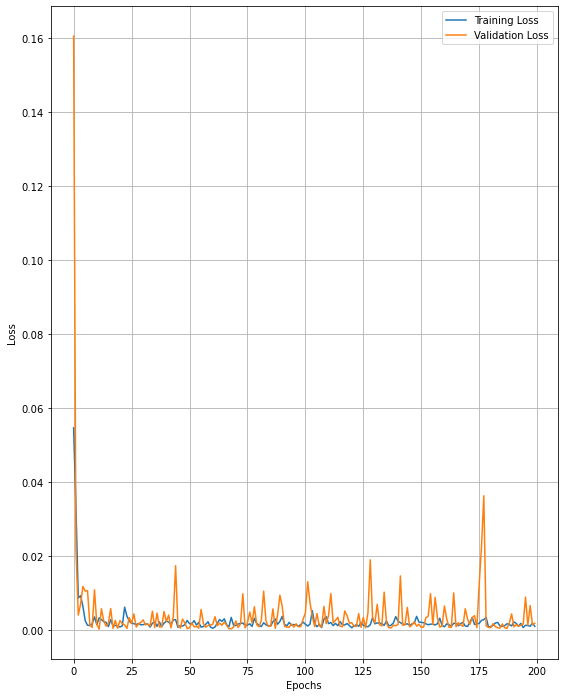

In [39]:
x = np.arange(0, EPOCHS, 1)                                                                  
plt.figure(1, figsize = (20, 12))                                  
plt.subplot(121)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(x, history.history["loss"], label = "Training Loss")
plt.plot(x, history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()   

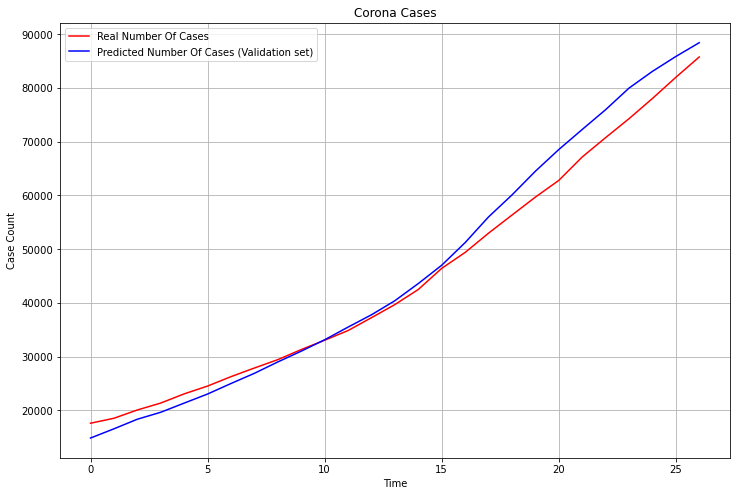

In [40]:
predicted_cases = model.predict(x_val)
predicted_cases = scaler.inverse_transform(predicted_cases)
real_cases = scaler.inverse_transform(y_val)
plt.figure(figsize= (12, 8))
plt.subplot(1,1,1)
plt.plot(real_cases, color = "red", label = "Real Number Of Cases")
plt.plot(predicted_cases, color = "blue", label = "Predicted Number Of Cases (Validation set)")
plt.title("Corona Cases")
plt.xlabel("Time")
plt.ylabel("Case Count")
plt.legend()
plt.grid("both")
plt.show()

In [41]:
"""
Saving model's topology
"""
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

"""
Saving model's weights
"""
model.save_weights("model.h5")

# Fatalities : 

In [42]:
len(train_india_fatal_cases)

115

In [43]:
train_india_fatal_cases_data = train_india_fatal_cases.iloc[0:train_india_size]
val_india_fatal_cases_data = train_india_fatal_cases.iloc[train_india_size : len(train_india_fatal_cases)]

In [44]:
print(len(train_india_fatal_cases_data))
print(len(val_india_fatal_cases_data))

86
29


In [45]:
x_train, y_train = createDataset(train_india_fatal_cases_data)
x_val, y_val = createDataset(val_india_fatal_cases_data)

In [46]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(84, 2, 1) (84, 1)
(27, 2, 1) (27, 1)


Using the same model architecture to predict. Re-training the same model on Fatal cases.

In [47]:
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train,epochs = EPOCHS, verbose = 1, batch_size = BATCH_SIZE, 
                     validation_data = (x_val, y_val))

Epoch 1/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 3/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 0.0110
Epoch 4/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 0.0091
Epoch 5/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 6/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 8.4699e-04
Epoch 7/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 8/200
84/84 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 9/200
84/84 [==============================] - 1s 8ms/step - loss: 9.4561e-04 - val_loss: 0.0036
Epoch 10/200
84/84 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.0012
E

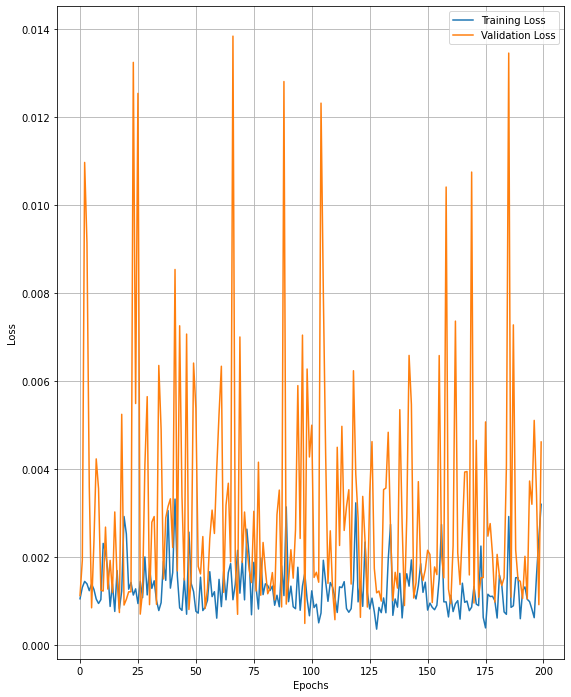

In [48]:
x = np.arange(0, EPOCHS, 1)                                                                  
plt.figure(1, figsize = (20, 12))                                  
plt.subplot(121)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(x, history.history["loss"], label = "Training Loss")
plt.plot(x, history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()   

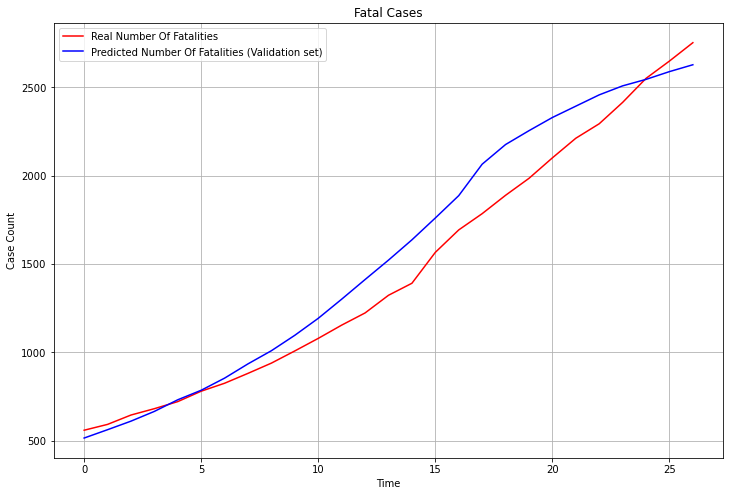

In [49]:
predicted_cases = model.predict(x_val)
predicted_cases = scaler.inverse_transform(predicted_cases)
real_cases = scaler.inverse_transform(y_val)
plt.figure(figsize= (12, 8))
plt.subplot(1,1,1)
plt.plot(real_cases, color = "red", label = "Real Number Of Fatalities")
plt.plot(predicted_cases, color = "blue", label = "Predicted Number Of Fatalities (Validation set)")
plt.title("Fatal Cases")
plt.xlabel("Time")
plt.ylabel("Case Count")
plt.legend()
plt.grid("both")
plt.show()